In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import time
import random

from sklearn.svm import SVC

#plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib.axes import Axes

In [3]:
def cal_score (y_pred,y_val):
    n11 = 0
    n12 = 0
    n21 = 0
    n22 = 0
    y_pred_array= np.array(y_pred)
    y_val_array= np.array(y_val)
    for j in range(len(y_pred_array)):
        if (y_pred_array[j]==2)&(y_val_array[j]==2):
            n22 = n22+1
        elif (y_pred_array[j]==1)&(y_val_array[j]==2):
            n12 = n12 +1
        elif (y_pred_array[j]==2)&(y_val_array[j]==1):
            n21 = n21+1
        else:
            n11 = n11+1 
    try:       
        Precall = n22 / ( n12 + n22)
        Pprecision = n22 / ( n21 + n22)
        f1_score = 2 / (1/Precall + 1/Pprecision)
        FPR = n21/(n21 + n11)
        FNR = n12/(n12 +n22 )
        BER = 1/2*(FPR+FNR)
        print ("n11:.."+str(n11)+"..n12:.."+str(n12)+"..n21:.."+str(n21)+"..n22:.."+str(n22))
        print ("TPR:"+str(Precall))
        print ("f1 score:" + str(f1_score))
        print ("FPR:"+ str(FPR))
        print ("BER:" + str(BER))
        return Precall,f1_score,BER,FPR
    except Exception as ex:
        print ("divided by zero, just skip")
        return 0,0,0,0

In [4]:
X_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_x_resample3000_boundarysel_50pergroup.csv")
y_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_y_resample3000_boundarysel_50pergroup.csv")
X_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\scaled_validation_feature.csv")
y_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_label.csv")
X_train = X_train.drop(["predict_cluster"],axis=1)
y_train = y_train.drop(["predict_cluster"],axis=1)
X_val = X_val.drop(["Unnamed: 0"],axis=1)
y_val = y_val.drop(["Unnamed: 0"],axis=1)

In [7]:
svc_clf=SVC(kernel="rbf",degree=len(X_train))

In [8]:
svc_clf.fit(X_train,y_train['label'])

KeyboardInterrupt: 

In [ ]:
y_pred=svc_clf.predict(X_val)

In [ ]:
TPR_svc, f1_score_svc, BER_svc = cal_score(y_pred_svc,y_val['label'])

In [11]:
#select some of the data randomly
train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
train = pd.DataFrame(data=train)
Class1_sample =pd.DataFrame.sample(train[train['label']==1],40000)
Class2_sample =pd.DataFrame.sample(train[train['label']==2],40000)
res = [Class1_sample, Class2_sample]
train_com = pd.concat(res)
sample_label = pd.DataFrame(train_com['label'])
sample_feature=train_com.drop(["label"],axis=1)

In [12]:
svc_clf=SVC(kernel="rbf",degree=len(sample_feature))
svc_clf.fit(sample_feature,sample_label['label'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=80000, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y_pred=svc_clf.predict(X_val)

In [21]:
#y_pred = {"label_pred":y_pred}
#y_pred = pd.DataFrame(data=y_pred)
Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])

n11:..49014..n12:..2879..n21:..12193..n22:..5941
TPR:0.6735827664399093
f1 score:0.44082510944572234
FPR:0.1992092407731142
BER:0.26281323716660243


In [22]:
#select some of the data randomly
train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
train = pd.DataFrame(data=train)
Class1_sample =pd.DataFrame.sample(train[train['label']==1],20000)
Class2_sample =pd.DataFrame.sample(train[train['label']==2],20000)
res = [Class1_sample, Class2_sample]
train_com = pd.concat(res)
sample_label = pd.DataFrame(train_com['label'])
sample_feature=train_com.drop(["label"],axis=1)

In [23]:
svc_clf=SVC(kernel="rbf",degree=len(sample_feature))
svc_clf.fit(sample_feature,sample_label['label'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=40000, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
y_pred=svc_clf.predict(X_val)

In [25]:
y_pred = {"label_pred":y_pred}
y_pred = pd.DataFrame(data=y_pred)
Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])

n11:..48957..n12:..2759..n21:..12250..n22:..6061
TPR:0.6871882086167801
f1 score:0.44679517894659254
FPR:0.20014050680477724
BER:0.25647614909399863


In [26]:
#select some of the data randomly
train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
train = pd.DataFrame(data=train)
Class1_sample =pd.DataFrame.sample(train[train['label']==1],10000)
Class2_sample =pd.DataFrame.sample(train[train['label']==2],10000)
res = [Class1_sample, Class2_sample]
train_com = pd.concat(res)
sample_label = pd.DataFrame(train_com['label'])
sample_feature=train_com.drop(["label"],axis=1)

In [27]:
svc_clf=SVC(kernel="rbf",degree=len(sample_feature))
svc_clf.fit(sample_feature,sample_label['label'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=20000, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
y_pred=svc_clf.predict(X_val)

In [29]:
y_pred = {"label_pred":y_pred}
y_pred = pd.DataFrame(data=y_pred)
Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])

n11:..48827..n12:..2703..n21:..12380..n22:..6117
TPR:0.6935374149659864
f1 score:0.4478529853204964
FPR:0.2022644468769912
BER:0.2543635159555024


In [30]:
#select some of the data randomly
train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
train = pd.DataFrame(data=train)
Class1_sample =pd.DataFrame.sample(train[train['label']==1],5000)
Class2_sample =pd.DataFrame.sample(train[train['label']==2],5000)
res = [Class1_sample, Class2_sample]
train_com = pd.concat(res)
sample_label = pd.DataFrame(train_com['label'])
sample_feature=train_com.drop(["label"],axis=1)

In [31]:
svc_clf=SVC(kernel="rbf",degree=len(sample_feature))
svc_clf.fit(sample_feature,sample_label['label'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=10000, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
y_pred=svc_clf.predict(X_val)

In [33]:
y_pred = {"label_pred":y_pred}
y_pred = pd.DataFrame(data=y_pred)
Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])

n11:..48599..n12:..2589..n21:..12608..n22:..6231
TPR:0.7064625850340136
f1 score:0.45055858852453085
FPR:0.20598951100364338
BER:0.2497634629848149


In [43]:
def adjustment (X_train,y_train):    
    t = 40000
    start1=time.time()
    label1_amount_list=[]
    label2_amount_list=[]
    ratio_list = []
    tpr_list = []
    fpr_list = []
    BER_list = []
    f1_score_list = []
    time_list=[]
    train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
    train = pd.DataFrame(data=train)
    while t >=5000: 
        start=time.time()
        Class1_sample =pd.DataFrame.sample(train[train['label']==1],t)
        Class2_sample =pd.DataFrame.sample(train[train['label']==2],20000)
        res = [Class1_sample, Class2_sample]
        train_com = pd.concat(res)
        sample_label = pd.DataFrame(train_com['label'])
        sample_feature=train_com.drop(["label"],axis=1)
        svc_clf=SVC(kernel="rbf",degree=len(sample_feature))
        svc_clf.fit(sample_feature,sample_label['label'])
        y_pred=svc_clf.predict(X_val)
        y_pred = {"label_pred":y_pred}
        y_pred = pd.DataFrame(data=y_pred)
        Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])
        tpr_list.append(Precall)
        f1_score_list.append(f1_score)
        BER_list.append(BER)
        fpr_list.append(FPR)
        label1_amount_list.append(t)
        label2_amount_list.append(20000)
        ratio_list.append(t/20000)
        temp=(time.time()-start)/60
        time_list.append(temp)
        print("current label1 amount:%d ,fit time:%5.1fminute"%(t,(time.time()-start)/60))
        t=t-5000
        print("                 ")
    print("the total executing time:%5.1fminute"%((time.time()-start1)/60))
    return tpr_list, fpr_list, BER_list, f1_score_list,ratio_list,time_list,label1_amount_list,label2_amount_list

In [44]:
tpr_list, fpr_list, BER_list, f1_score_list,ratio_list,time_list,label1_amount_list,label2_amount_list=adjustment(X_train,y_train)

n11:..55505..n12:..4623..n21:..5702..n22:..4197
TPR:0.47585034013605443
f1 score:0.4484213900315188
FPR:0.0931592791674155
BER:0.30865446951568054
current label1 amount:40000 ,fit time:  1.6minute
                 
n11:..54739..n12:..4038..n21:..6468..n22:..4782
TPR:0.5421768707482993
f1 score:0.4765321375186846
FPR:0.10567418759292238
BER:0.2817486584223115
current label1 amount:35000 ,fit time:  1.4minute
                 
n11:..53334..n12:..3757..n21:..7873..n22:..5063
TPR:0.5740362811791383
f1 score:0.4654348225776797
FPR:0.12862907837338866
BER:0.2772963985971252
current label1 amount:30000 ,fit time:  1.2minute
                 
n11:..52281..n12:..3376..n21:..8926..n22:..5444
TPR:0.617233560090703
f1 score:0.46951272100043123
FPR:0.14583299295832175
BER:0.2642997164338094
current label1 amount:25000 ,fit time:  1.0minute
                 
n11:..49120..n12:..2761..n21:..12087..n22:..6059
TPR:0.6869614512471656
f1 score:0.4493807016242677
FPR:0.19747741271423203
BER:0.2552579807335

In [48]:
boundary_50pergroup={"tpr":tpr_list,"fpr":fpr_list,"BER":BER_list,"f1_score":f1_score_list,"ratio":ratio_list,"time":time_list,"label 1 amount":label1_amount_list,"label 2 amount":label2_amount_list}
boundary_50pergroup=pd.DataFrame(data=boundary_50pergroup)

In [49]:
boundary_50pergroup.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\SVC_boundary_50pergroup.csv",index=True)

In [50]:
boundary_50pergroup

,BER,f1_score,fpr,label 1 amount,label 2 amount,ratio,time,tpr
0,0.308654,0.448421,0.093159,40000,20000,2.00,1.610058,0.475850
1,0.281749,0.476532,0.105674,35000,20000,1.75,1.363921,0.542177
2,0.277296,0.465435,0.128629,30000,20000,1.50,1.223474,0.574036
3,0.264300,0.469513,0.145833,25000,20000,1.25,1.038446,0.617234
4,0.255258,0.449381,0.197477,20000,20000,1.00,0.896161,0.686961
5,0.253428,0.415383,0.282027,15000,20000,0.75,0.741593,0.775170
6,0.291383,0.345874,0.461450,10000,20000,0.50,0.543928,0.878685
7,0.381209,0.275209,0.727270,5000,20000,0.25,0.341231,0.964853


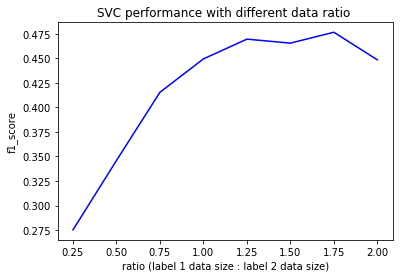

In [54]:
plt.title("SVC performance with different data ratio ")
plt.plot(ratio_list,f1_score_list,"b-")
plt.xlabel('ratio (label 1 data size : label 2 data size)')
plt.ylabel('f1_score')
plt.show()

In [55]:
#function plot the ROC
def plot_roc_curve(fpr, tpr, color,label):
    plt.plot(fpr, tpr, linewidth=2,color=color,label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

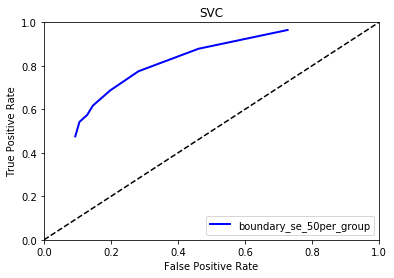

In [56]:
plt.title("SVC")
plot_roc_curve(fpr_list,tpr_list,color='b',label='boundary_se_50per_group')
plt.show()

In [57]:
#IMPORT CNN
X_train_CNN=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_x_resample3000_CNN.csv")
y_train_CNN=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_y_resample3000_CNN.csv")
X_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\scaled_validation_feature.csv")
y_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_label.csv")
X_val = X_val.drop(["Unnamed: 0"],axis=1)
y_val = y_val.drop(["Unnamed: 0"],axis=1)

In [58]:
tpr_list_CNN, fpr_list_CNN, BER_list_CNN, f1_score_list_CNN,ratio_list_CNN,time_list_CNN,label1_amount_list_CNN,label2_amount_list_CNN=adjustment(X_train_CNN,y_train_CNN)

n11:..56805..n12:..5358..n21:..4402..n22:..3462
TPR:0.3925170068027211
f1 score:0.415008391273076
FPR:0.07191987844527586
BER:0.33970143582127743
current label1 amount:40000 ,fit time:  1.3minute
                 
n11:..56281..n12:..5113..n21:..4926..n22:..3707
TPR:0.42029478458049885
f1 score:0.42479802899215036
FPR:0.08048099073635369
BER:0.33009310307792744
current label1 amount:35000 ,fit time:  1.1minute
                 
n11:..55650..n12:..4820..n21:..5557..n22:..4000
TPR:0.45351473922902497
f1 score:0.43532676715459545
FPR:0.09079026908686914
BER:0.3186377649289221
current label1 amount:30000 ,fit time:  1.0minute
                 
n11:..54450..n12:..4235..n21:..6757..n22:..4585
TPR:0.5198412698412699
f1 score:0.4548159904771352
FPR:0.11039586975345957
BER:0.29527729995609486
current label1 amount:25000 ,fit time:  0.9minute
                 
n11:..52979..n12:..3864..n21:..8228..n22:..4956
TPR:0.5619047619047619
f1 score:0.45046355208143973
FPR:0.13442906857058834
BER:0.28626215

In [59]:
CNN={"tpr":tpr_list_CNN,"fpr":fpr_list_CNN,"BER":BER_list_CNN,"f1_score":f1_score_list_CNN,"ratio":ratio_list_CNN,"time":time_list_CNN,"label 1 amount":label1_amount_list_CNN,"label 2 amount":label2_amount_list_CNN}
CNN=pd.DataFrame(data=CNN)

In [60]:
CNN.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\SVC_CNN.csv",index=True)
CNN

,BER,f1_score,fpr,label 1 amount,label 2 amount,ratio,time,tpr
0,0.339701,0.415008,0.071920,40000,20000,2.00,1.297493,0.392517
1,0.330093,0.424798,0.080481,35000,20000,1.75,1.147641,0.420295
2,0.318638,0.435327,0.090790,30000,20000,1.50,1.002979,0.453515
3,0.295277,0.454816,0.110396,25000,20000,1.25,0.914527,0.519841
4,0.286262,0.450464,0.134429,20000,20000,1.00,0.738270,0.561905
5,0.264077,0.444225,0.189831,15000,20000,0.75,0.607650,0.661678
6,0.254489,0.416439,0.276439,10000,20000,0.50,0.461697,0.767460
7,0.322990,0.316438,0.545640,5000,20000,0.25,0.283799,0.899660


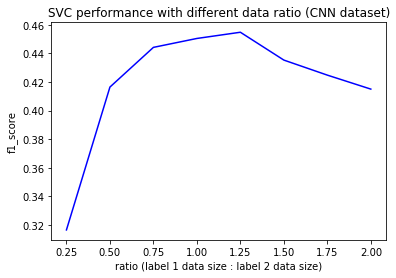

In [61]:
plt.title("SVC performance with different data ratio (CNN dataset)")
plt.plot(ratio_list_CNN,f1_score_list_CNN,"b-")
plt.xlabel('ratio (label 1 data size : label 2 data size)')
plt.ylabel('f1_score')
plt.show()

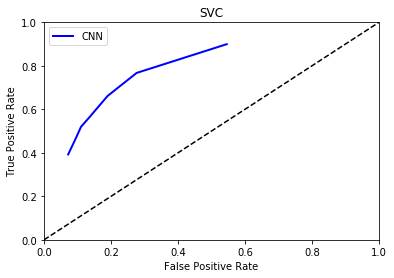

In [62]:
plt.title("SVC")
plot_roc_curve(fpr_list_CNN,tpr_list_CNN,color='b',label='CNN')
plt.show()

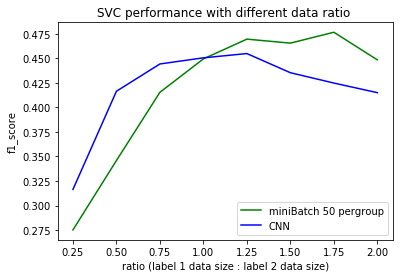

In [65]:
plt.title("SVC performance with different data ratio ")
plt.plot(ratio_list,f1_score_list,"g-",label="miniBatch 50 pergroup")
plt.plot(ratio_list_CNN,f1_score_list_CNN,"b-",label="CNN")
plt.xlabel('ratio (label 1 data size : label 2 data size)')
plt.ylabel('f1_score')
plt.legend()
plt.show()

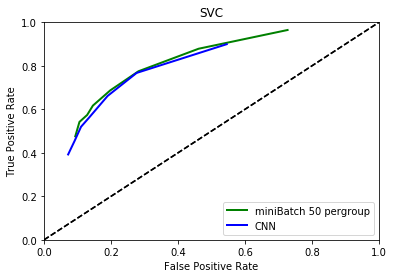

In [66]:
plt.title("SVC")
plot_roc_curve(fpr_list,tpr_list,color='g',label='miniBatch 50 pergroup')
plot_roc_curve(fpr_list_CNN,tpr_list_CNN,color='b',label='CNN')
plt.show()